In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc

In [2]:
rcParams['savefig.dpi'] = 300
rcParams['figure.dpi'] = 300
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

\begin{equation}
    \frac{q}{\sqrt{g \cdot H_{m 0}^{3}}}=\frac{0.023}{\sqrt{\tan \alpha}} \gamma_{b} \cdot \xi_{m-1,0} \cdot \exp \left[-\left(2.7 \frac{R_{c}}{\xi_{m-1,0} \cdot H_{m 0} \cdot \gamma_{b} \cdot \gamma_{f} \cdot \gamma_{\beta} \cdot \gamma_{v}}\right)^{1.3}\right]
\end{equation}

\begin{equation}
\frac{q_{max}}{\sqrt{g \cdot H_{m 0}^{3}}}=0.09 \cdot \exp \left[-\left(1.5 \frac{R_{c}}{H_{m 0} \cdot \gamma_{f} \cdot \gamma_{\beta} \cdot \gamma_{v}}\right)^{1.3}\right]
\end{equation}

In [4]:
surge_tide = [3.217853397,3.129784897,3.011694997,2.882887097,2.818109797,2.674751097,2.506357897,2.938605197]
# T = [9.5016076, 9.4770921, 9.0278389, 8.6234757, 8.0506301, 6.8425639, 6.8425639, 7.8807362]
tana = 1/9.239262072771174, 1/8.55676469566654, 1/7.5402416401230665
# Tp0 = np.array([11.4318, 11.3536, 10.6366, 10.3227, 9.5153, 8.1821, 3.9466, 9.4109])
dirs_norm = 45, 30, 63
gamma_b = 1
# T_mneg10 = 0.9*Tp0
gamma_f = .9
gamma_v = 1
Rc =  np.array([[2.66540804, 3.64920968, 2.70336713],
       [2.75347654, 3.73727818, 2.79143563],
       [2.87156644, 3.85536808, 2.90952553],
       [3.00037434, 3.98417598, 3.03833343],
       [3.06515164, 4.04895328, 3.10311073],
       [3.20851034, 4.19231198, 3.24646943],
       [3.37690354, 4.36070518, 3.41486263],
       [2.94465624, 3.92845788, 2.98261533]])

q_mat = np.zeros([8,3])
q_max_mat = np.zeros([8,3])
project_name = "Eastbourne_01"
for scenario in range(1,9):
    for loc in range(1,4):
        if (scenario!=8):
            work_path = "../../Schenarios/Scenario_"+str(scenario)+"/SWAN/Output/"
        else:
            work_path = "../../Schenarios/Scenario_"+str(scenario)+"_alt/SWAN/Output/"
        head = (pd.read_csv(work_path+"/"+project_name+"_loc"+str(loc)+".tab",sep='\s+',skiprows=4)).columns[1:]
        df = pd.read_csv(work_path+"/"+project_name+"_loc"+str(loc)+".tab",sep='\s+',skiprows=7, names= head)
        T_mneg10 = df.Tm_10[0]
        iri = tana[loc-1]/(df.Hsig[0]/(1.56*T_mneg10**2))**.5
        gamma_beta = 1 - 0.0033*np.abs(df.Dir[0] - (90+dirs_norm[loc-1]))

        q = (9.81*df.Hsig[0]**3)**.5 * 0.023/(tana[loc-1])**.5 * gamma_b * iri * np.exp(-(2.7*Rc[scenario-1][loc-1]/(iri*df.Hsig[0]*gamma_b*gamma_f*gamma_beta*gamma_v))**1.3)
        q_max = (9.81*df.Hsig[0]**3)**.5 * 0.09 * np.exp(-(1.5*Rc[scenario-1][loc-1]/(df.Hsig[0]*gamma_f*gamma_beta*gamma_v))**1.3)
        
        q_max_mat[scenario-1,loc-1] = q_max*1000
        q_mat[scenario-1,loc-1] = q*1000
#         print(df.Hsig[0])
# np.savetxt('../Overtopping results/q_emp.txt',q_mat)
# np.savetxt('../Overtopping results/qmax_emp.txt',q_max_mat)
np.round(q_mat,2),(),np.round(q_max_mat)

(array([[5.33, 0.1 , 1.65],
        [3.43, 0.05, 0.96],
        [0.79, 0.  , 0.12],
        [0.14, 0.  , 0.01],
        [0.01, 0.  , 0.  ],
        [0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  ],
        [1.47, 0.21, 8.35]]),
 (),
 array([[237.,  43.,  48.],
        [200.,  33.,  36.],
        [116.,  13.,  12.],
        [ 60.,   4.,   3.],
        [ 23.,   1.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [280., 221., 290.]]))

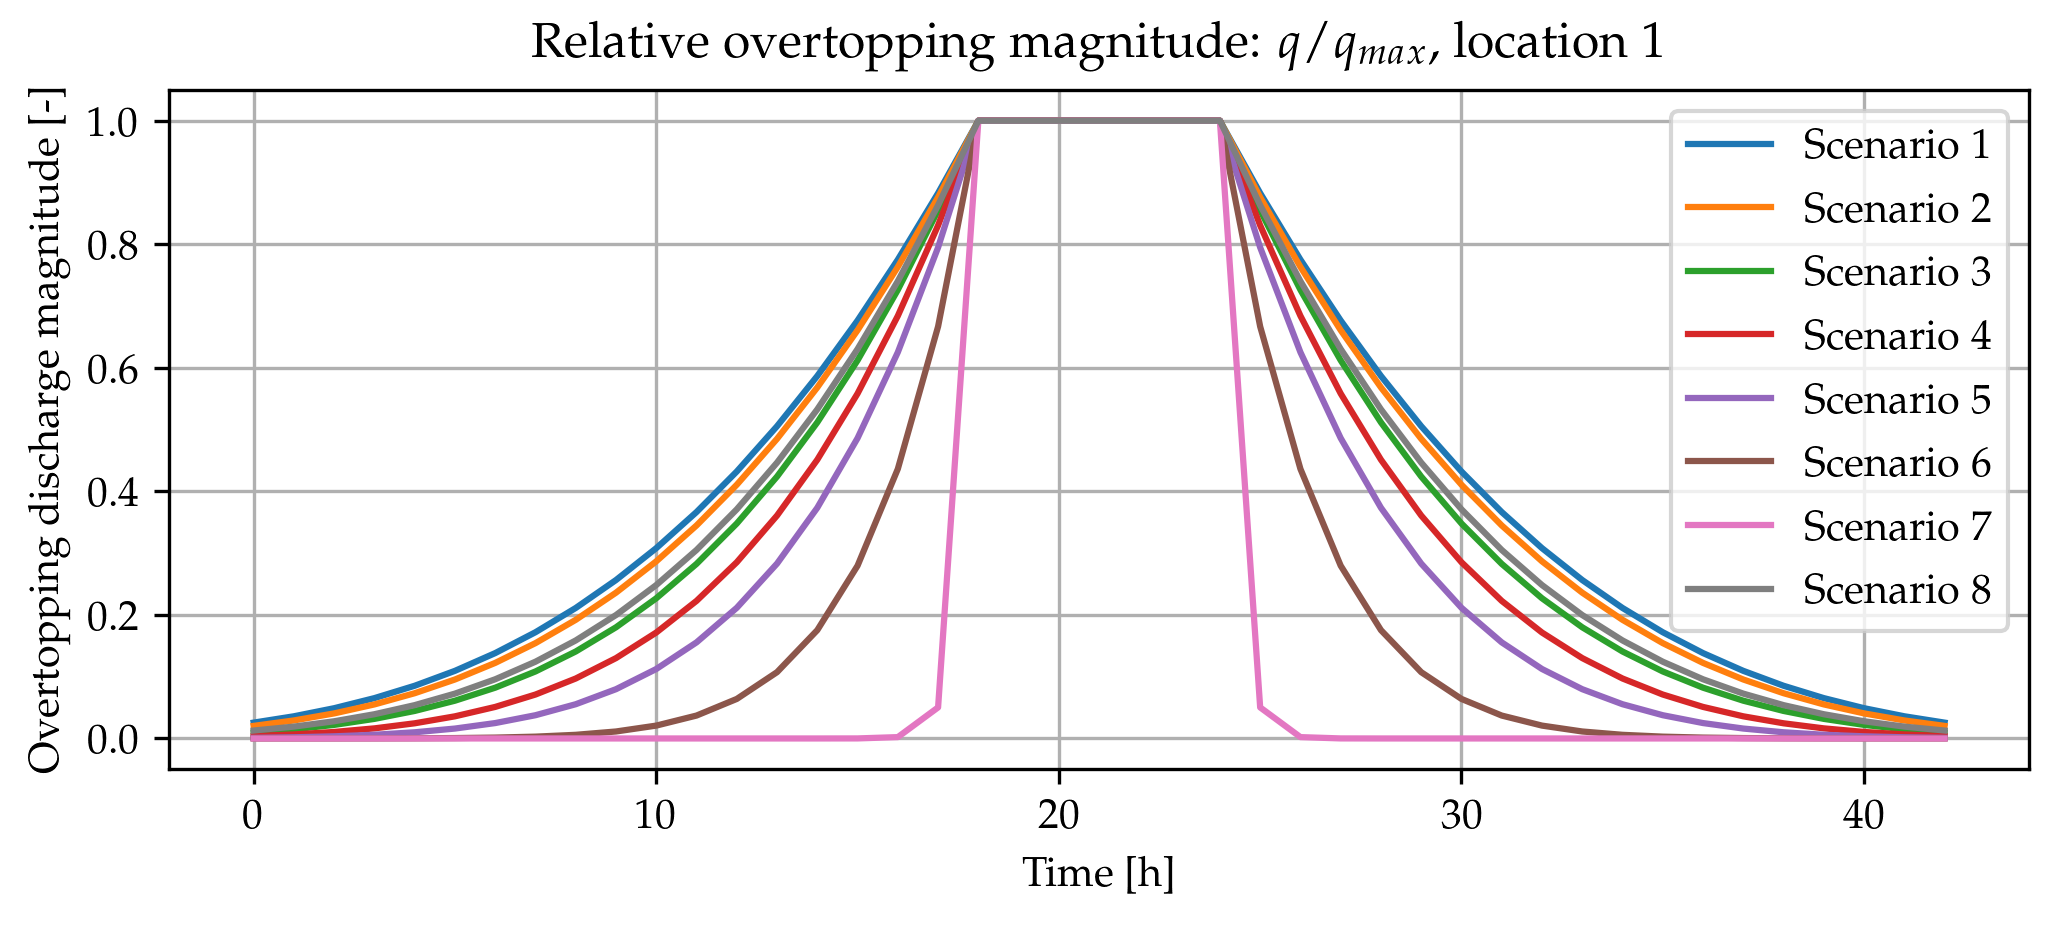

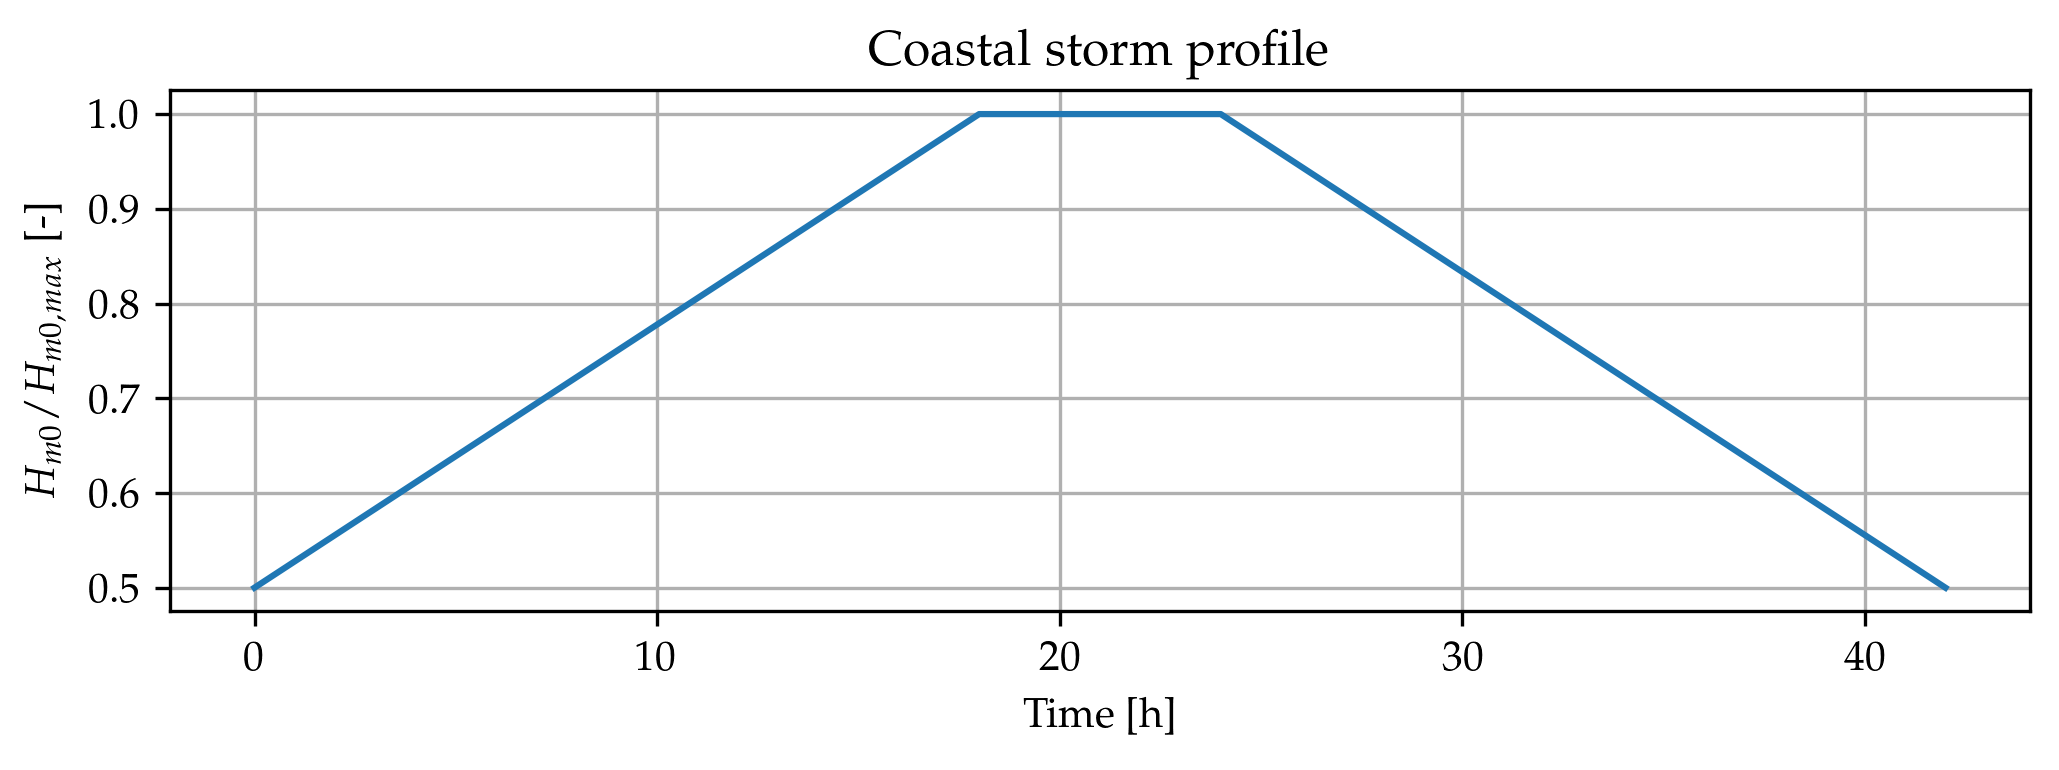

In [49]:
t = np.linspace(0,42,43)
h_sc = list(np.linspace(0.5,1,19))+list(np.ones(5))+list(np.linspace(1,0.5,19))
Q_t = np.zeros([8,5,43])

plt.figure(figsize=[8,3])
for scenario in range(1,9):
    for loc in range(1,2):
        if (scenario!=8):
            work_path = "../../Schenarios/Scenario_"+str(scenario)+"/SWAN/Output/"
        else:
            work_path = "../../Schenarios/Scenario_"+str(scenario)+"_alt/SWAN/Output/"

        head = (pd.read_csv(work_path+"/"+project_name+"_loc"+str(loc)+".tab",sep='\s+',skiprows=4)).columns[1:]
        df = pd.read_csv(work_path+"/"+project_name+"_loc"+str(loc)+".tab",sep='\s+',skiprows=7, names= head)
        T_mneg10 = df.Tm_10[0]
        iri = tana[loc-1]/(h_sc*np.array(df.Hsig[0])/(1.56*T_mneg10**2))**.5
        gamma_beta = 1 - 0.0033*np.abs(df.Dir[0] - (90+dirs_norm[loc-1]))

        q = (np.array(9.81)*(h_sc*np.array(df.Hsig[0]))**3)**.5 * 0.023/(tana[loc-1])**.5 * gamma_b * iri * np.exp(-(2.7*Rc[scenario-1][loc-1]/(iri*h_sc*np.array(df.Hsig[0])*gamma_b*gamma_f*gamma_beta*gamma_v))**1.3)
        q_rel = q/max(q)
        plt.plot(q_rel,label='Scenario '+str(scenario))
        Q_t[scenario-1,loc-1] = q_rel
plt.legend()
plt.title("Relative overtopping magnitude: $q/q_{max}$, location "+str(loc))
plt.xlabel('Time [h]')
plt.ylabel('Overtopping discharge magnitude [-]')
plt.grid()

plt.figure(figsize=[8,2.3])
plt.title("Coastal storm profile")
plt.xlabel('Time [h]')
plt.grid()
plt.ylabel('$H_{m0}/H_{m0,max}$ [-]')
plt.plot(t,h_sc)

In [32]:
(np.array(9.81)*(h_sc*np.array(df.Hsig[0]))**3)**.5 * 0.023/(tana[loc-1])**.5 * gamma_b * iri * np.exp(-(2.7*Rc[scenario-1][loc-1]/(iri*h_sc*np.array(df.Hsig[0])*gamma_b*gamma_f*gamma_beta*gamma_v))**1.3) - (np.array(9.81)*(h_sc*np.array(df.Hsig[0]**3)))**.5 * 0.023/(tana[loc-1])**.5 * gamma_b * iri * np.exp(-(2.7*Rc[scenario-1][loc-1]/(iri*h_sc*np.array(df.Hsig[0])*gamma_b*gamma_f*gamma_beta*gamma_v))**1.3)

array([-0.00027609, -0.00033769, -0.00040284, -0.00046978, -0.00053647,
       -0.00060068, -0.00065998, -0.00071182, -0.0007535 , -0.0007823 ,
       -0.0007954 , -0.00078998, -0.00076322, -0.0007123 , -0.00063445,
       -0.00052694, -0.00038709, -0.00021229,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.00021229, -0.00038709, -0.00052694, -0.00063445, -0.0007123 ,
       -0.00076322, -0.00078998, -0.0007954 , -0.0007823 , -0.0007535 ,
       -0.00071182, -0.00065998, -0.00060068, -0.00053647, -0.00046978,
       -0.00040284, -0.00033769, -0.00027609])

In [37]:
# Intermediate location 1

surge_tide = [3.217853397,3.129784897,3.011694997,2.882887097,2.818109797,2.674751097,2.506357897,2.938605197]
# T = [9.5016076, 9.4770921, 9.0278389, 8.6234757, 8.0506301, 6.8425639, 6.8425639, 7.8807362]
tana = 1/9.239262072771174, 1/8.55676469566654, 1/7.5402416401230665
# Tp0 = np.array([11.4318, 11.3536, 10.6366, 10.3227, 9.5153, 8.1821, 3.9466, 9.4109])
dirs_norm = 45, 30, 63
gamma_b = 1
# T_mneg10 = 0.9*Tp0
gamma_f = .9
gamma_v = 1
Rc =  np.array([[2.66540804, 3.64920968, 2.70336713],
       [2.75347654, 3.73727818, 2.79143563],
       [2.87156644, 3.85536808, 2.90952553],
       [3.00037434, 3.98417598, 3.03833343],
       [3.06515164, 4.04895328, 3.10311073],
       [3.20851034, 4.19231198, 3.24646943],
       [3.37690354, 4.36070518, 3.41486263],
       [2.94465624, 3.92845788, 2.98261533]])
Rc[:,1] += +1.33293693

q_mat_2 = np.zeros([8,3])
q_max_mat = np.zeros([8,3])
project_name = "Eastbourne_01"
for scenario in range(1,9):
    for loc in range(2,3):
        if (scenario!=8):
            work_path = "../../Schenarios/Scenario_"+str(scenario)+"/SWAN/Output/"
        else:
            work_path = "../../Schenarios/Scenario_"+str(scenario)+"_alt/SWAN/Output/"
        head = (pd.read_csv(work_path+"/"+project_name+"_loc"+str(loc)+".tab",sep='\s+',skiprows=4)).columns[1:]
        df = pd.read_csv(work_path+"/"+project_name+"_loc"+str(loc)+".tab",sep='\s+',skiprows=7, names= head)
        T_mneg10 = df.Tm_10[0]
        iri = tana[loc-1]/(h_sc*np.array(df.Hsig[0])/(1.56*T_mneg10**2))**.5
        gamma_beta = 1 - 0.0033*np.abs(df.Dir[0] - (90+dirs_norm[loc-1]))

        q = (np.array(9.81)*(h_sc*np.array(df.Hsig[0]))**3)**.5 * 0.023/(tana[loc-1])**.5 * gamma_b * iri * np.exp(-(2.7*Rc[scenario-1][loc-1]/(iri*h_sc*np.array(df.Hsig[0])*gamma_b*gamma_f*gamma_beta*gamma_v))**1.3)
#         q_max = (9.81*df.Hsig[0]**3)**.5 * 0.09 * np.exp(-(1.5*Rc[scenario-1][loc-1]/(df.Hsig[0]*gamma_f*gamma_beta*gamma_v))**1.3)
        
        q_max_mat[scenario-1,loc-1] = q_max*1000
#         q_mat_2[scenario-1,loc-1] = q*1000
        q_rel = q/max(q)
        Q_t[scenario-1,3] = q_rel
#         plt.plot(q_rel,label='Scenario '+str(scenario))
#         print(df.Hsig[0])
# np.round(q_mat_2,2),(),np.round(q_max_mat)
# np.savetxt('../Overtopping results/q_emp_i.txt',q_mat_2)

In [38]:
# Intermediate location 2

surge_tide = [3.217853397,3.129784897,3.011694997,2.882887097,2.818109797,2.674751097,2.506357897,2.938605197]
# T = [9.5016076, 9.4770921, 9.0278389, 8.6234757, 8.0506301, 6.8425639, 6.8425639, 7.8807362]
tana = 1/9.239262072771174, 1/8.55676469566654, 1/7.5402416401230665
# Tp0 = np.array([11.4318, 11.3536, 10.6366, 10.3227, 9.5153, 8.1821, 3.9466, 9.4109])
dirs_norm = 45, 60, 63
gamma_b = 1
# T_mneg10 = 0.9*Tp0
gamma_f = .9
gamma_v = 1
Rc =  np.array([[2.66540804, 3.64920968, 2.70336713],
       [2.75347654, 3.73727818, 2.79143563],
       [2.87156644, 3.85536808, 2.90952553],
       [3.00037434, 3.98417598, 3.03833343],
       [3.06515164, 4.04895328, 3.10311073],
       [3.20851034, 4.19231198, 3.24646943],
       [3.37690354, 4.36070518, 3.41486263],
       [2.94465624, 3.92845788, 2.98261533]])

q_mat_3 = np.zeros([8,3])
q_max_mat = np.zeros([8,3])
project_name = "Eastbourne_01"
for scenario in range(1,9):
    for loc in range(2,3):
        if (scenario!=8):
            work_path = "../../Schenarios/Scenario_"+str(scenario)+"/SWAN/Output/"
        else:
            work_path = "../../Schenarios/Scenario_"+str(scenario)+"_alt/SWAN/Output/"
        head = (pd.read_csv(work_path+"/"+project_name+"_loc"+str(loc)+".tab",sep='\s+',skiprows=4)).columns[1:]
        df = pd.read_csv(work_path+"/"+project_name+"_loc"+str(loc)+".tab",sep='\s+',skiprows=7, names= head)
        T_mneg10 = df.Tm_10[0]
        iri = tana[loc-1]/(h_sc*np.array(df.Hsig[0])/(1.56*T_mneg10**2))**.5
        gamma_beta = 1 - 0.0033*np.abs(df.Dir[0] - (90+dirs_norm[loc-1]))

        q = (np.array(9.81)*(h_sc*np.array(df.Hsig[0]))**3)**.5 * 0.023/(tana[loc-1])**.5 * gamma_b * iri * np.exp(-(2.7*Rc[scenario-1][loc-1]/(iri*h_sc*np.array(df.Hsig[0])*gamma_b*gamma_f*gamma_beta*gamma_v))**1.3)
        q_max = (9.81*df.Hsig[0]**3)**.5 * 0.09 * np.exp(-(1.5*Rc[scenario-1][loc-1]/(df.Hsig[0]*gamma_f*gamma_beta*gamma_v))**1.3)
        
        q_rel = q/max(q)
        Q_t[scenario-1,4] = q_rel
#         plt.plot(q_rel,label='Scenario '+str(scenario))
        q_max_mat[scenario-1,loc-1] = q_max*1000
#         q_mat_3[scenario-1,loc-1] = q*1000
# np.round(q_mat_3,2)

In [35]:
np.save('C:/Users/ianmu/OneDrive - Imperial College London/Thesis/Code/Hand calculations/rel_Q_t',Q_t)

In [79]:
q_i = np.zeros([len(q_mat),2])
q_i[:,0] = q_mat_2[:,1]
q_i[:,1] = q_mat_3[:,1]
# np.savetxt('../Overtopping results/q_emp_i.txt',q_i)
q_i

array([[1.13743813e-03, 2.33172800e-02],
       [4.65137836e-04, 1.05348662e-02],
       [1.09530344e-05, 4.58353997e-04],
       [2.05869368e-07, 1.56123580e-05],
       [5.29158965e-10, 1.09211038e-07],
       [1.02662398e-19, 8.17773860e-16],
       [2.81132753e-87, 6.54578503e-73],
       [3.95589855e-03, 6.53795648e-01]])

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


Text(0.5, 227.75979846084982, 'Scenario')

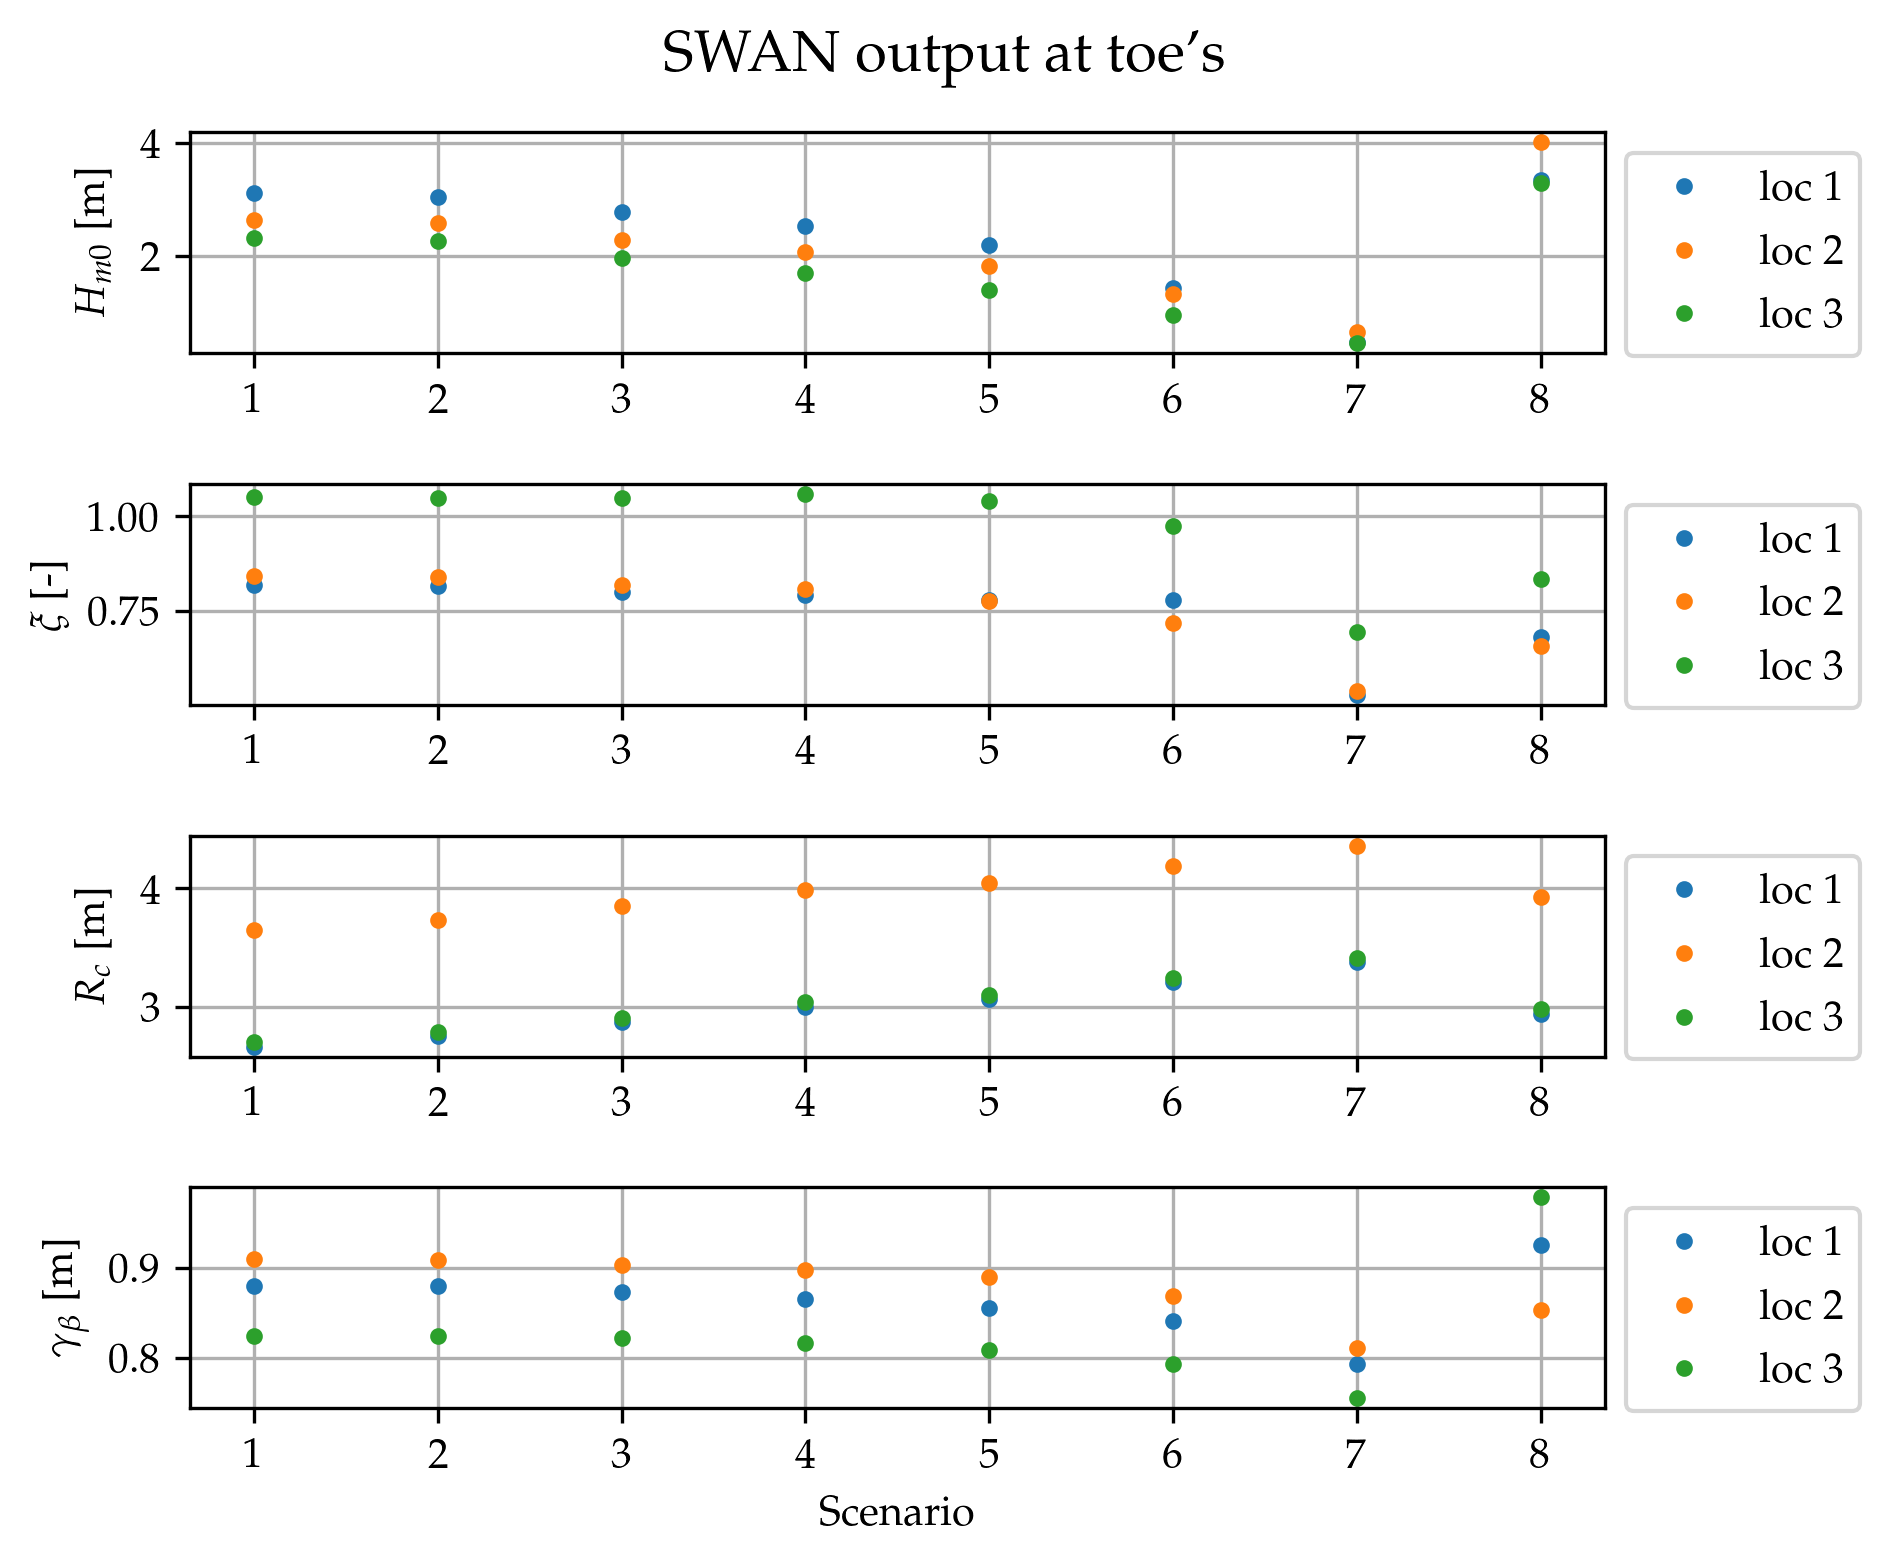

In [9]:
plt.figure(figsize=[8*.8,6])
plt.suptitle("SWAN output at toe's",fontsize=14)
###############################################
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.tight_layout(rect=[0, 0.15, 1, 0.95])
    loc_col = np.nan, 'tab:blue', 'tab:orange', 'tab:green'
    for scenario in range(1,9):
        for loc in range(1,4):
            if (scenario!=8):
                work_path = "../../Schenarios/Scenario_"+str(scenario)+"/SWAN/Output/"
            else:
                work_path = "../../Schenarios/Scenario_"+str(scenario)+"_alt/SWAN/Output/"
            head = (pd.read_csv(work_path+"/"+project_name+"_loc"+str(loc)+".tab",sep='\s+',skiprows=4)).columns[1:]
            df = pd.read_csv(work_path+"/"+project_name+"_loc"+str(loc)+".tab",sep='\s+',skiprows=7, names= head)
            T_mneg10 = df.Tm_10[0]
            iri = tana[loc-1]/(df.Hsig[0]/(1.56*T_mneg10**2))**.5
            gamma_beta = 1 - 0.0033*np.abs(df.Dir[0] - (90+dirs_norm[loc-1]))
            plt.ylabel(('$H_{m0}$ [m]', '$\\xi$ [-]', '$R_c$ [m]', '$\gamma_\\beta$ [m]')[i])
            plot_vars = df.Hsig[0],iri,Rc[scenario-1][loc-1],gamma_beta
            if (scenario == 1):
                plt.plot(scenario,plot_vars[i],'.',color=loc_col[loc],label="loc "+str(loc))
            else:
                plt.plot(scenario,plot_vars[i],'.',color=loc_col[loc])
#     plt.title(['Significant waveheights ($H_{m0}$)','Iribarren number $\\xi$','Free board ($R_c$)','Oblique wave attack reduction factor ($\gamma_\\beta$)'][i])
    plt.grid()
    plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.xlabel('Scenario')

In [98]:
plt.figure()
plt.title('$\beta$')

Text(0.5, 1.0, '$\x08eta$')

RuntimeError: latex was not able to process the following string:
b'$\\x08eta$'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (MiKTeX 20.6.29)
entering extended mode
(C:/Users/ianmu/.matplotlib/tex.cache/762935ae376817c232720bc7249955f7.tex
LaTeX2e <2020-02-02> patch level 5
L3 programming layer <2020-06-18>
(C:\Users\ianmu\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(C:\Users\ianmu\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\ianmu\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\ianmu\AppData\Local\Programs\MiKTeX\tex/latex/psnfss\mathpazo.sty)
(C:\Users\ianmu\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty)
(C:\Users\ianmu\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\ianmu\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\ianmu\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Users\ianmu\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\ianmu\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\ianmu\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.cfg)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
(C:\Users\ianmu\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-dvi
ps.def) (762935ae376817c232720bc7249955f7.aux)
(C:\Users\ianmu\AppData\Local\Programs\MiKTeX\tex/latex/psnfss\ot1ppl.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(C:\Users\ianmu\AppData\Local\Programs\MiKTeX\tex/latex/psnfss\omlzplm.fd)
(C:\Users\ianmu\AppData\Local\Programs\MiKTeX\tex/latex/psnfss\omszplm.fd)
(C:\Users\ianmu\AppData\Local\Programs\MiKTeX\tex/latex/psnfss\omxzplm.fd)
(C:\Users\ianmu\AppData\Local\Programs\MiKTeX\tex/latex/psnfss\ot1zplm.fd)

! Package inputenc Error: Unicode character  (U+0008)
(inputenc)                not set up for use with LaTeX.

See the inputenc package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.14 \fontsize{12.000000}{15.000000}{\rmfamily $
                                                 eta$}
No pages of output.
Transcript written on 762935ae376817c232720bc7249955f7.log.




<Figure size 1800x1200 with 1 Axes>